## Importar Librerías 

In [101]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

## Leer el Archivo CSV

In [54]:
# Cargar el archivo CSV en un DataFrame de pandas
input_file ='G:/Mi unidad/Meli/Netflix-Movies-and-TV-Shows/data/netflix_titles_cleaned.csv'
df = pd.read_csv(input_file, encoding='utf-8')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8807,s8808,TV Show,Parasyte: The Grey,Yeon Sang-ho,"Shin Hyun-been, Jeon Yeo-bin, Goo Kyo-hwan",South Korea,"April 5, 2024",2024,TV-MA,1 Season,"Sci-fi, Horror, Action",A new breed of parasitic aliens arrive on Eart...


## Análisis general 

In [55]:
# Mostrar información general del DataFrame
print("\nInformación general del DataFrame:")
print(df.info())



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   object
 2   title         8809 non-null   object
 3   director      6175 non-null   object
 4   cast          7984 non-null   object
 5   country       7978 non-null   object
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8805 non-null   object
 9   duration      8806 non-null   object
 10  listed_in     8809 non-null   object
 11  description   8809 non-null   object
dtypes: int64(1), object(11)
memory usage: 826.0+ KB
None


In [56]:
# Verificar valores nulos
print("\nNúmero de valores nulos por columna:")
print(df.isnull().sum())



Número de valores nulos por columna:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


**Transformamos los valores nulos de duración a enteros igual a cero**

In [58]:
# Limpiar la columna 'duration' y convertir a numérico
df['duration'] = df['duration'].astype(str)  # Asegurar que todos los datos sean cadenas
df['duration'] = df['duration'].str.replace(' min', '', regex=False)  # Remover ' min'
df['duration'] = df['duration'].str.replace(' Seasons', '', regex=False)  # Remover ' Seasons'
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')  # Convertir a numérico, NaN si no puede convertir
df['duration'] = df['duration'].fillna(0).astype(int)  # Reemplazar NaN con 0 y convertir a entero

In [59]:
# Verificar si hay duplicados
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())



Número de filas duplicadas:
0


## Análisis de Duración

In [60]:
# Verificar valores únicos en la columna 'type'
unique_types = df['type'].unique()
print("Valores únicos en la columna 'type':", unique_types)

# Verificar si hay valores nulos en la columna 'type'
null_values = df['type'].isnull().sum()
print("Número de valores nulos en la columna 'type':", null_values)

# Verificar la cantidad de cada tipo en la columna 'type'
type_counts = df['type'].value_counts()
print("\nConteo de cada tipo en la columna 'type':")
print(type_counts)

Valores únicos en la columna 'type': ['Movie' 'TV Show']
Número de valores nulos en la columna 'type': 0

Conteo de cada tipo en la columna 'type':
type
Movie      6132
TV Show    2677
Name: count, dtype: int64


In [61]:
# Separar películas y series
movies = df[df['type'] == 'Movie'].copy()
shows = df[df['type'] == 'TV Show'].copy()

In [62]:
# Convertir todos los valores en 'duration' a string
movies['duration'] = movies['duration'].astype(str)
shows['duration'] = shows['duration'].astype(str)

# Reemplazar valores nulos en la columna 'duration' con '0' antes de convertir
movies['duration'] = movies['duration'].str.replace(' min', '').replace('nan', '0').astype(int)
shows['duration'] = shows['duration'].str.replace(' Seasons', '').str.replace(' Season', '').replace('nan', '0').astype(int)



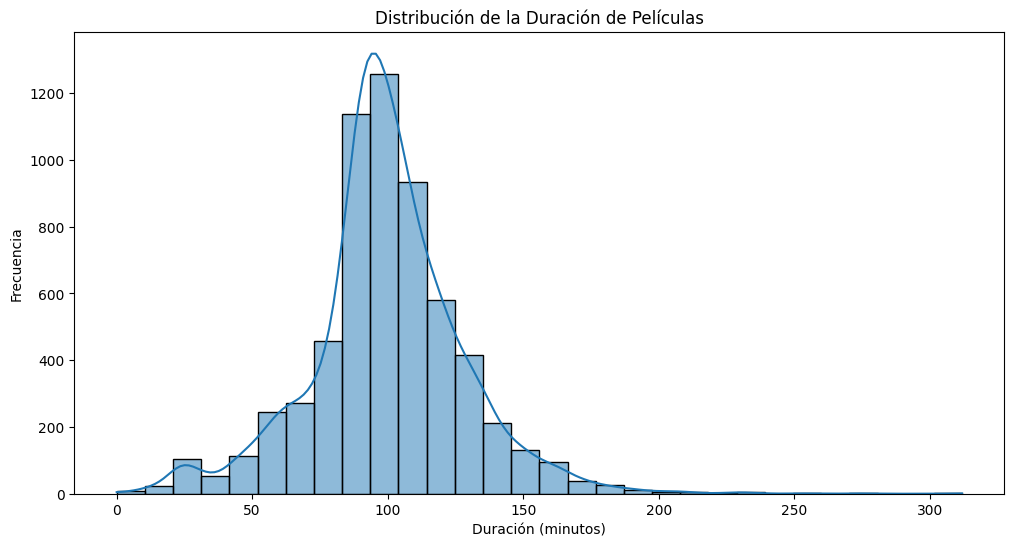

In [63]:
# Visualizar la distribución de la duración de películas
plt.figure(figsize=(12, 6))
sns.histplot(movies['duration'], kde=True, bins=30)
plt.title('Distribución de la Duración de Películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.show()


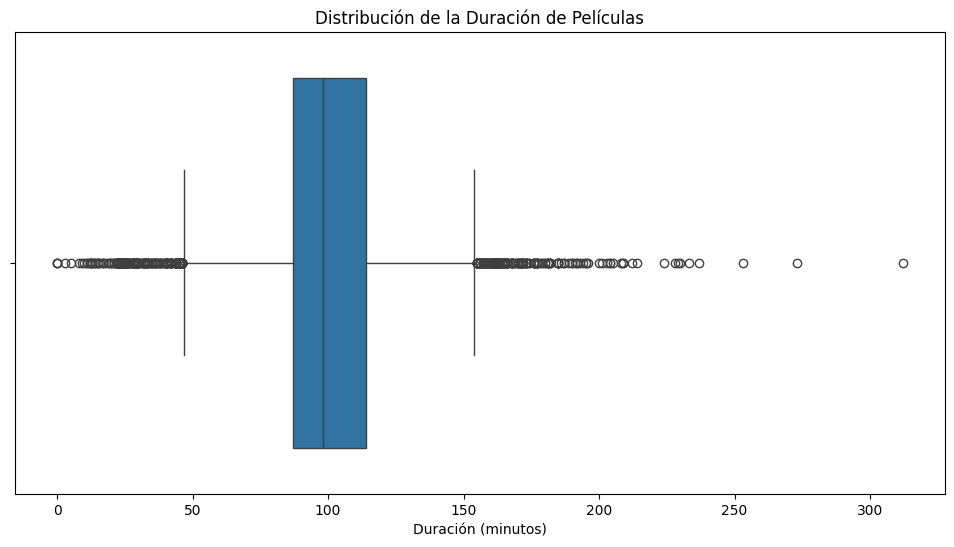

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de caja para la duración de películas
plt.figure(figsize=(12, 6))
sns.boxplot(x=movies['duration'])
plt.title('Distribución de la Duración de Películas')
plt.xlabel('Duración (minutos)')
plt.show()

In [103]:
# Filtrar datos del año 2000 en adelante
movie_outlier = movies[movies['duration'] >= 300]
movie_outlier

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


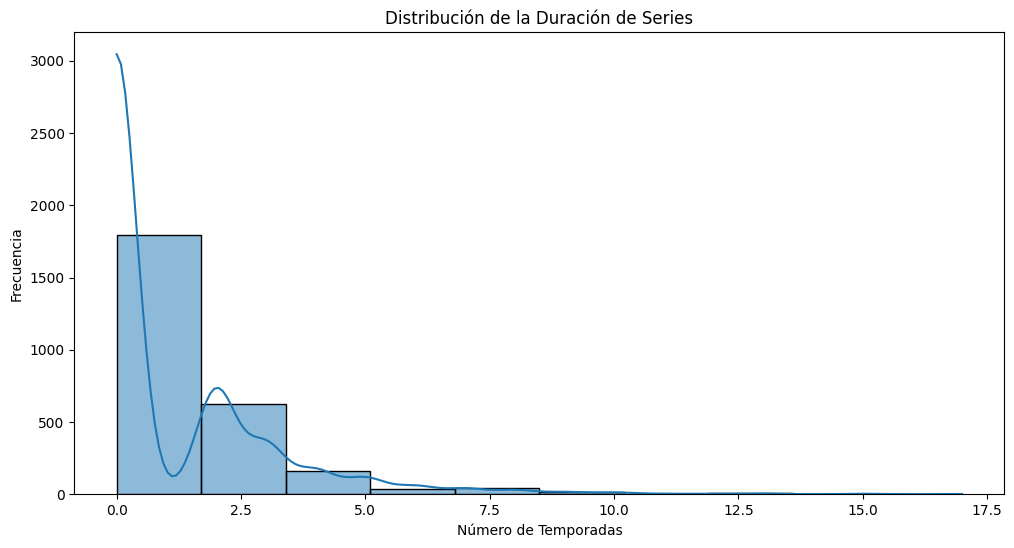

In [65]:
# Visualizar la distribución de la duración de series
plt.figure(figsize=(12, 6))
sns.histplot(shows['duration'], kde=True, bins=10)
plt.title('Distribución de la Duración de Series')
plt.xlabel('Número de Temporadas')
plt.ylabel('Frecuencia')
plt.show()

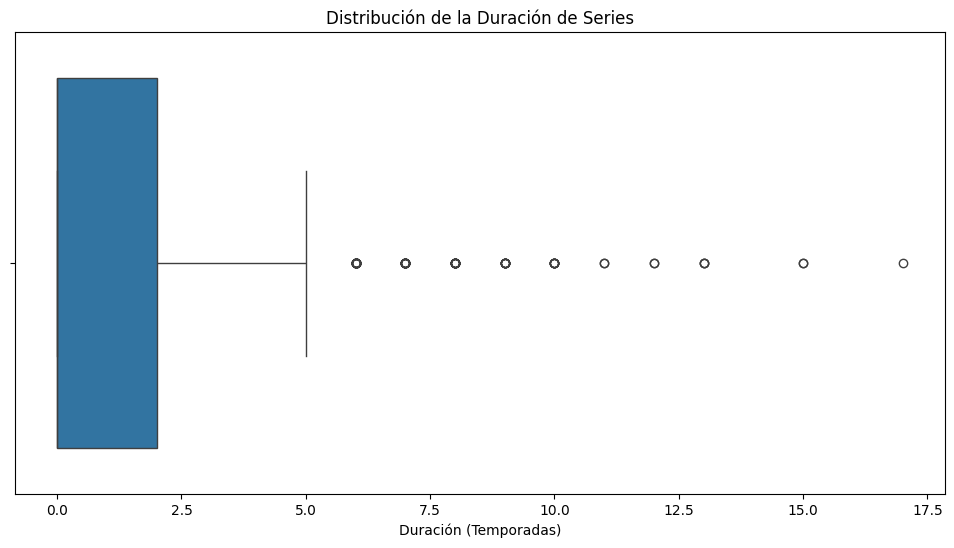

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de caja para la duración de películas
plt.figure(figsize=(12, 6))
sns.boxplot(x=shows['duration'])
plt.title('Distribución de la Duración de Series')
plt.xlabel('Duración (Temporadas)')
plt.show()

In [105]:
# Filtrar datos del año 2000 en adelante
shows_outlier = shows[shows['duration'] >= 15]
shows_outlier

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
548,s549,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"July 3, 2021",2020,TV-14,17,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...
2423,s2424,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...","United States, Canada","June 5, 2020",2019,TV-14,15,"Classic & Cult TV, TV Action & Adventure, TV H...","Siblings Dean and Sam crisscross the country, ..."
4798,s4799,TV Show,NCIS,NaN,"Mark Harmon, Michael Weatherly, Pauley Perrett...",United States,"July 1, 2018",2017,TV-14,15,"Crime TV Shows, TV Dramas, TV Mysteries",Follow the quirky agents of the NCIS â the N...


## Análisis Tendencia

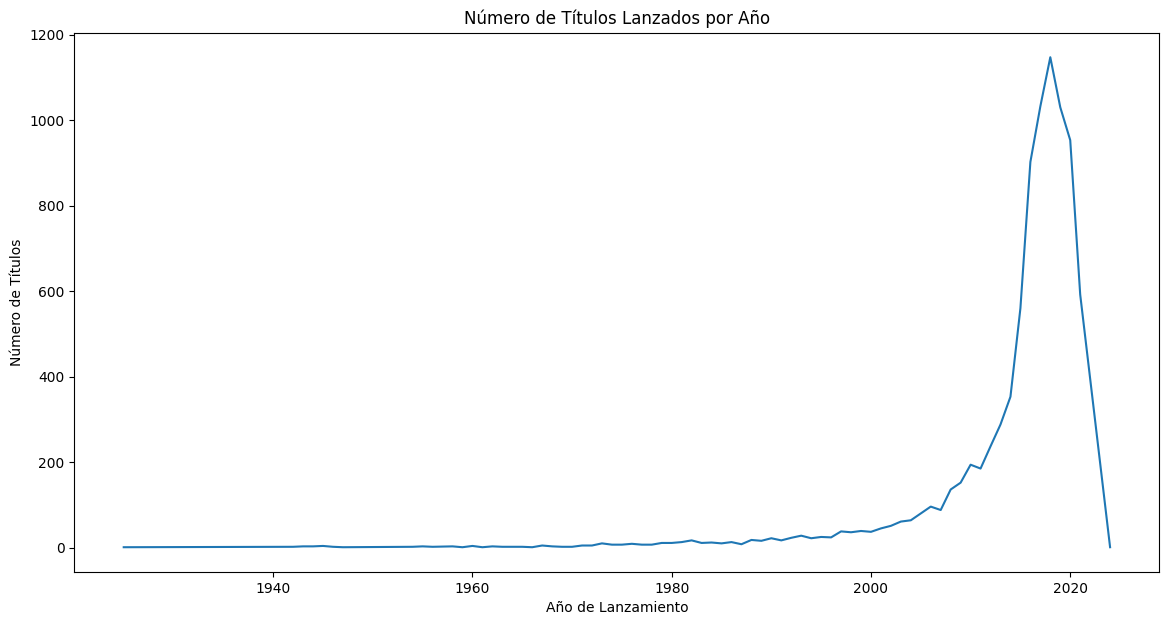

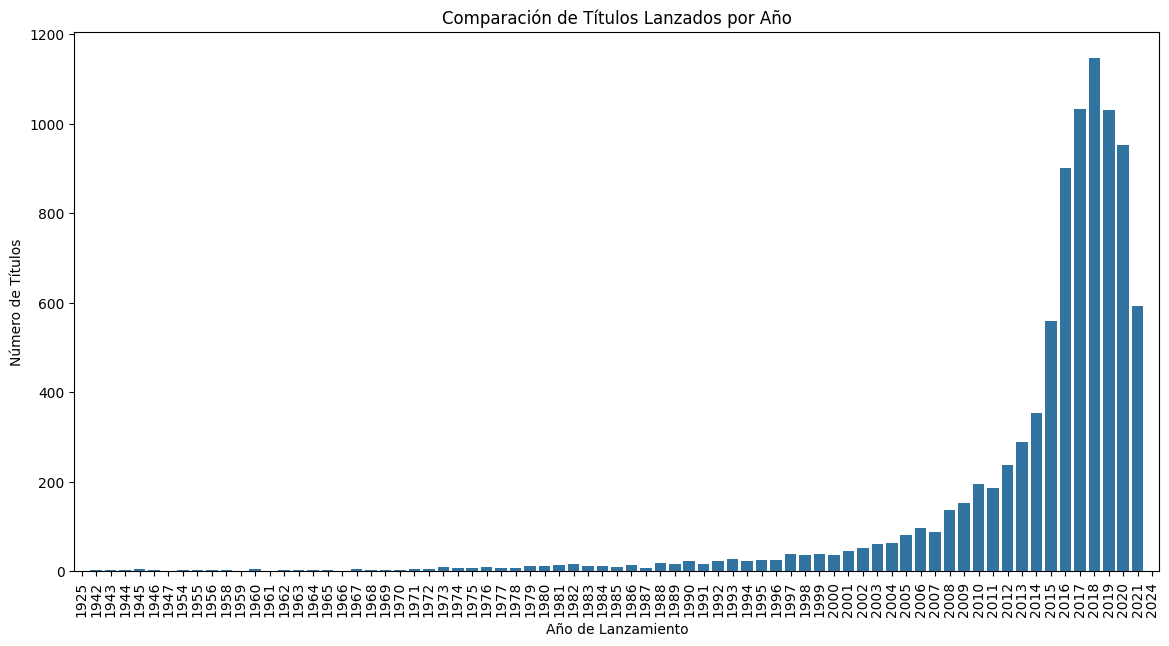

In [72]:
# Contar títulos por año de lanzamiento
titles_per_year = df.groupby('release_year').size().reset_index(name='count')

# Visualizar la tendencia de lanzamientos por año
plt.figure(figsize=(14, 7))
sns.lineplot(data=titles_per_year, x='release_year', y='count')
plt.title('Número de Títulos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Títulos')
plt.show()

# Visualizar la comparación de lanzamientos por año
plt.figure(figsize=(14, 7))
sns.barplot(data=titles_per_year, x='release_year', y='count')
plt.title('Comparación de Títulos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=90)
plt.show()


<Figure size 1400x600 with 0 Axes>

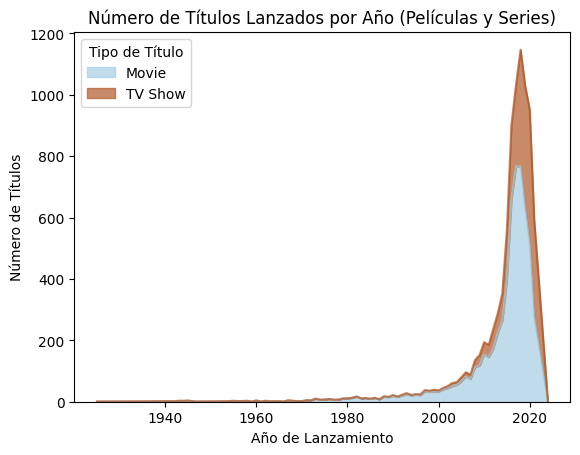

In [75]:
# Contar títulos por año de lanzamiento y tipo
titles_per_year = df.groupby(['release_year', 'type']).size().reset_index(name='count')

# Pivotear los datos para facilitar el gráfico de áreas acumuladas
titles_per_year_pivot = titles_per_year.pivot(index='release_year', columns='type', values='count').fillna(0)

# Visualizar la tendencia de lanzamientos por año con gráfico de área acumulado
plt.figure(figsize=(14, 6))
titles_per_year_pivot.plot(kind='area', stacked=True, colormap='Paired', alpha=0.7)
plt.title('Número de Títulos Lanzados por Año (Películas y Series)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Títulos')
plt.legend(title='Tipo de Título')
plt.show()

In [76]:
# Filtrar datos del año 2000 en adelante
df_filtered = df[df['release_year'] >= 2000]

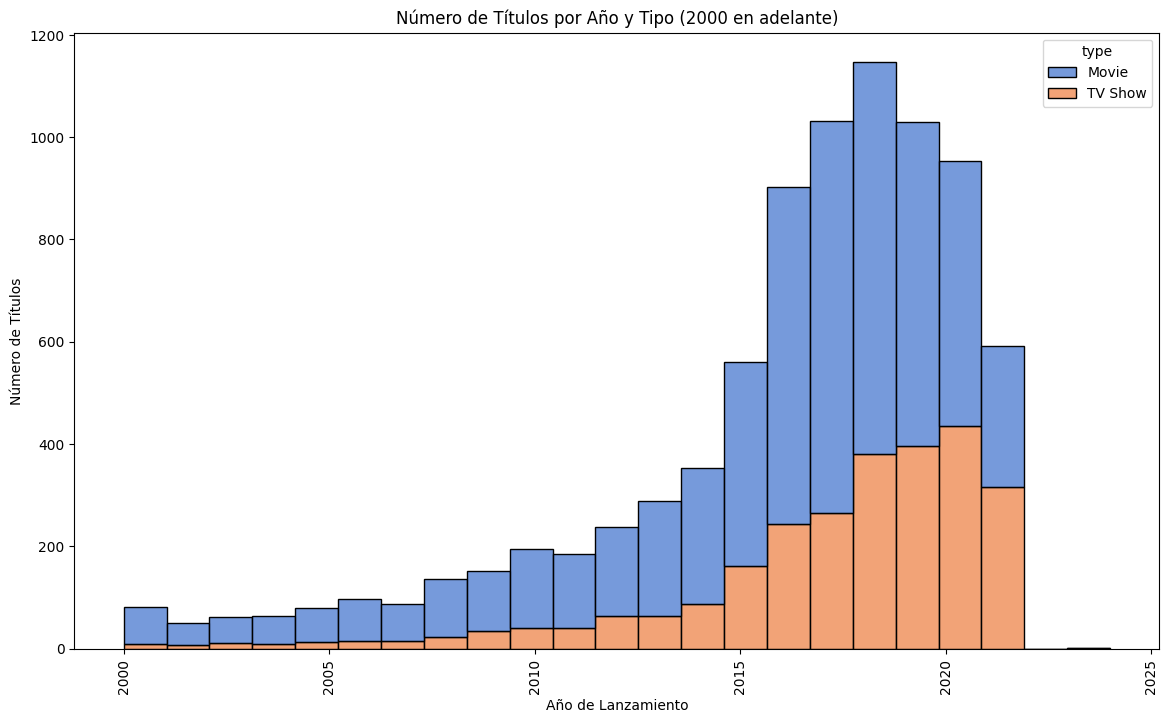

In [95]:
# Crear el gráfico de barra acumulado
plt.figure(figsize=(14, 8))

sns.histplot(
    data=df_filtered,
    x='release_year',
    hue='type',
    multiple='stack',
    palette='muted',
    bins=len(df_filtered['release_year'].unique())
)

plt.title('Número de Títulos por Año y Tipo (2000 en adelante)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=90)
plt.show()

* Se observa el crecimiento de proporción de series sobre el total de publicaciones desde el 2005 en adelante, llegando al 2021 con mayor cantidad que películas.

## Análisis Adicionales

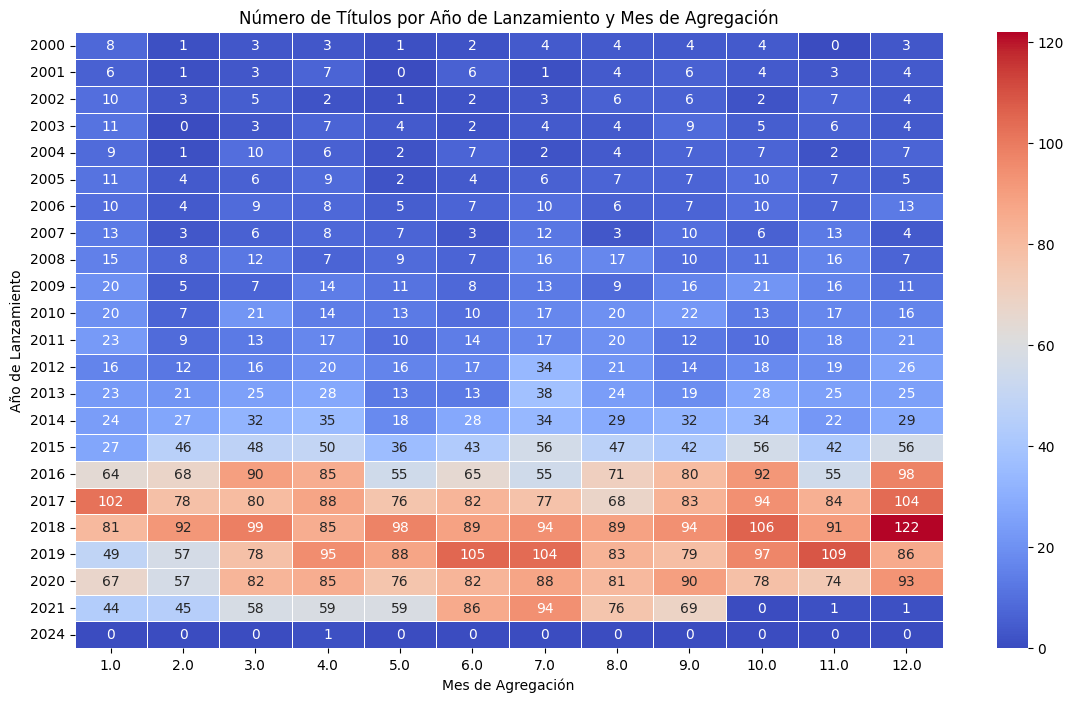

In [93]:
# Convertir 'date_added' a datetime, ignorando los errores
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extraer el mes de 'date_added'
df['month_added'] = df['date_added'].dt.month

# Crear una tabla de contingencia que cuenta el número de títulos por combinación de 'release_year' y 'month_added'
contingency_table = pd.crosstab(df_filtered['release_year'], df_filtered['month_added'])

# Crear el mapa de calor
plt.figure(figsize=(14, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5)
plt.title('Número de Títulos por Año de Lanzamiento y Mes de Agregación')
plt.xlabel('Mes de Agregación')
plt.ylabel('Año de Lanzamiento')
plt.show()

### Rating 

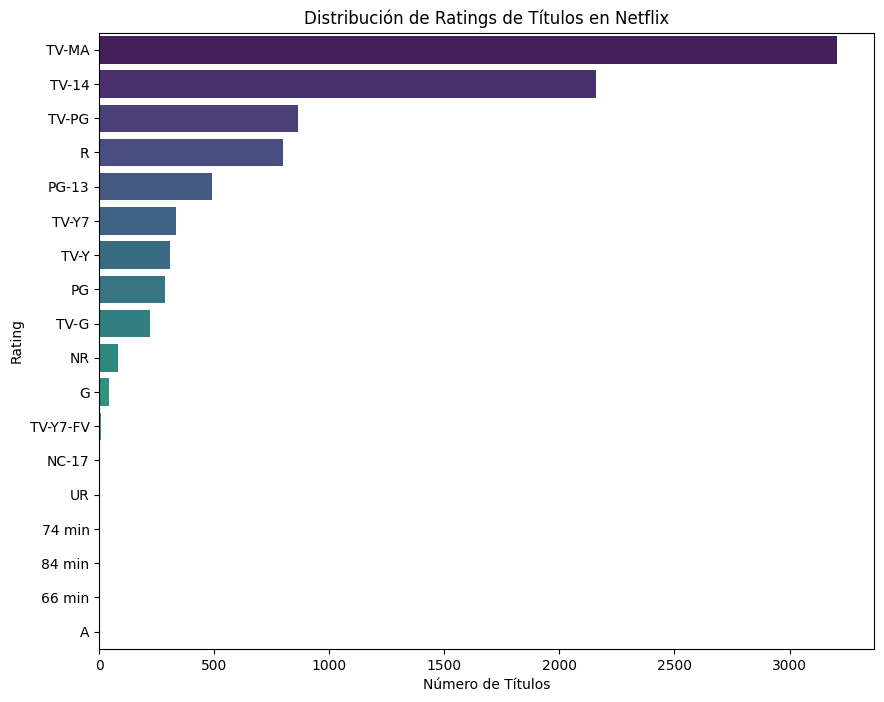

In [99]:
# Contar el número de títulos para cada valor único en la columna 'rating'
rating_counts = df['rating'].value_counts()

# Convertir el resultado en un DataFrame para facilitar la visualización
rating_df = rating_counts.reset_index()
rating_df.columns = ['Rating', 'Cantidad']

# Ordenar el DataFrame por cantidad en orden descendente
rating_df = rating_df.sort_values(by='Cantidad', ascending=False)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 8))
sns.barplot(
    data=rating_df,
    x='Cantidad',
    y='Rating',
    hue='Rating',  
    palette='viridis',  # La paleta de colores
    legend=False,  # Desactivar la leyenda
    order=rating_df['Rating']  # Ordenar el eje Y de acuerdo con el DataFrame ordenado
)

plt.title('Distribución de Ratings de Títulos en Netflix')
plt.xlabel('Número de Títulos')
plt.ylabel('Rating')
plt.show()

### Contenido en Descripciones

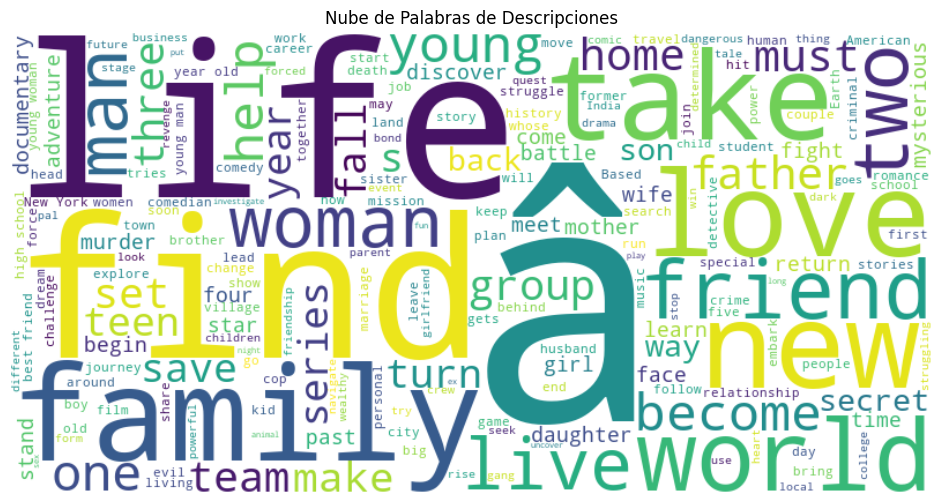

In [102]:
# Concatenar todas las descripciones en una sola cadena de texto
text = ' '.join(df['description'].dropna())

# Generar la nube de palabras
wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=400,
    colormap='viridis',  # Puedes cambiar la paleta de colores
    stopwords=set(WordCloud().stopwords)  # Eliminar palabras comunes en inglés
).generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Descripciones')
plt.show()

### Distribuciones por TOP 10 de países con mayor publicaciones

C:\Users\leabr\AppData\Local\Temp\ipykernel_12952\2972924984.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10_countries, x='number_of_titles', y='country', palette='viridis')


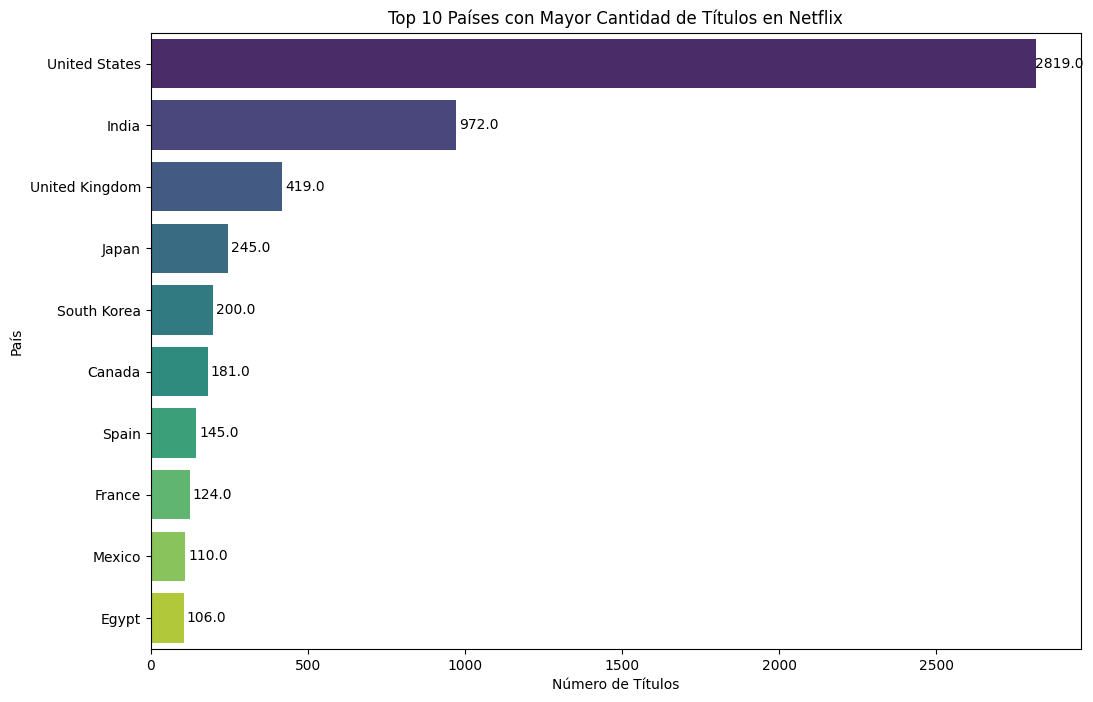

In [108]:
# Contar la cantidad de títulos por país y obtener los 10 países con más títulos
top_10_countries = df['country'].value_counts().head(10).reset_index()
top_10_countries.columns = ['country', 'number_of_titles']

# Crear el gráfico de barras laterales
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=top_10_countries, x='number_of_titles', y='country', palette='viridis')

# Agregar etiquetas de valor
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', 
                (p.get_width() + 50, p.get_y() + p.get_height() / 2),
                ha='center', va='center', 
                xytext=(5, 0), 
                textcoords='offset points')

plt.title('Top 10 Países con Mayor Cantidad de Títulos en Netflix')
plt.xlabel('Número de Títulos')
plt.ylabel('País')
plt.show()

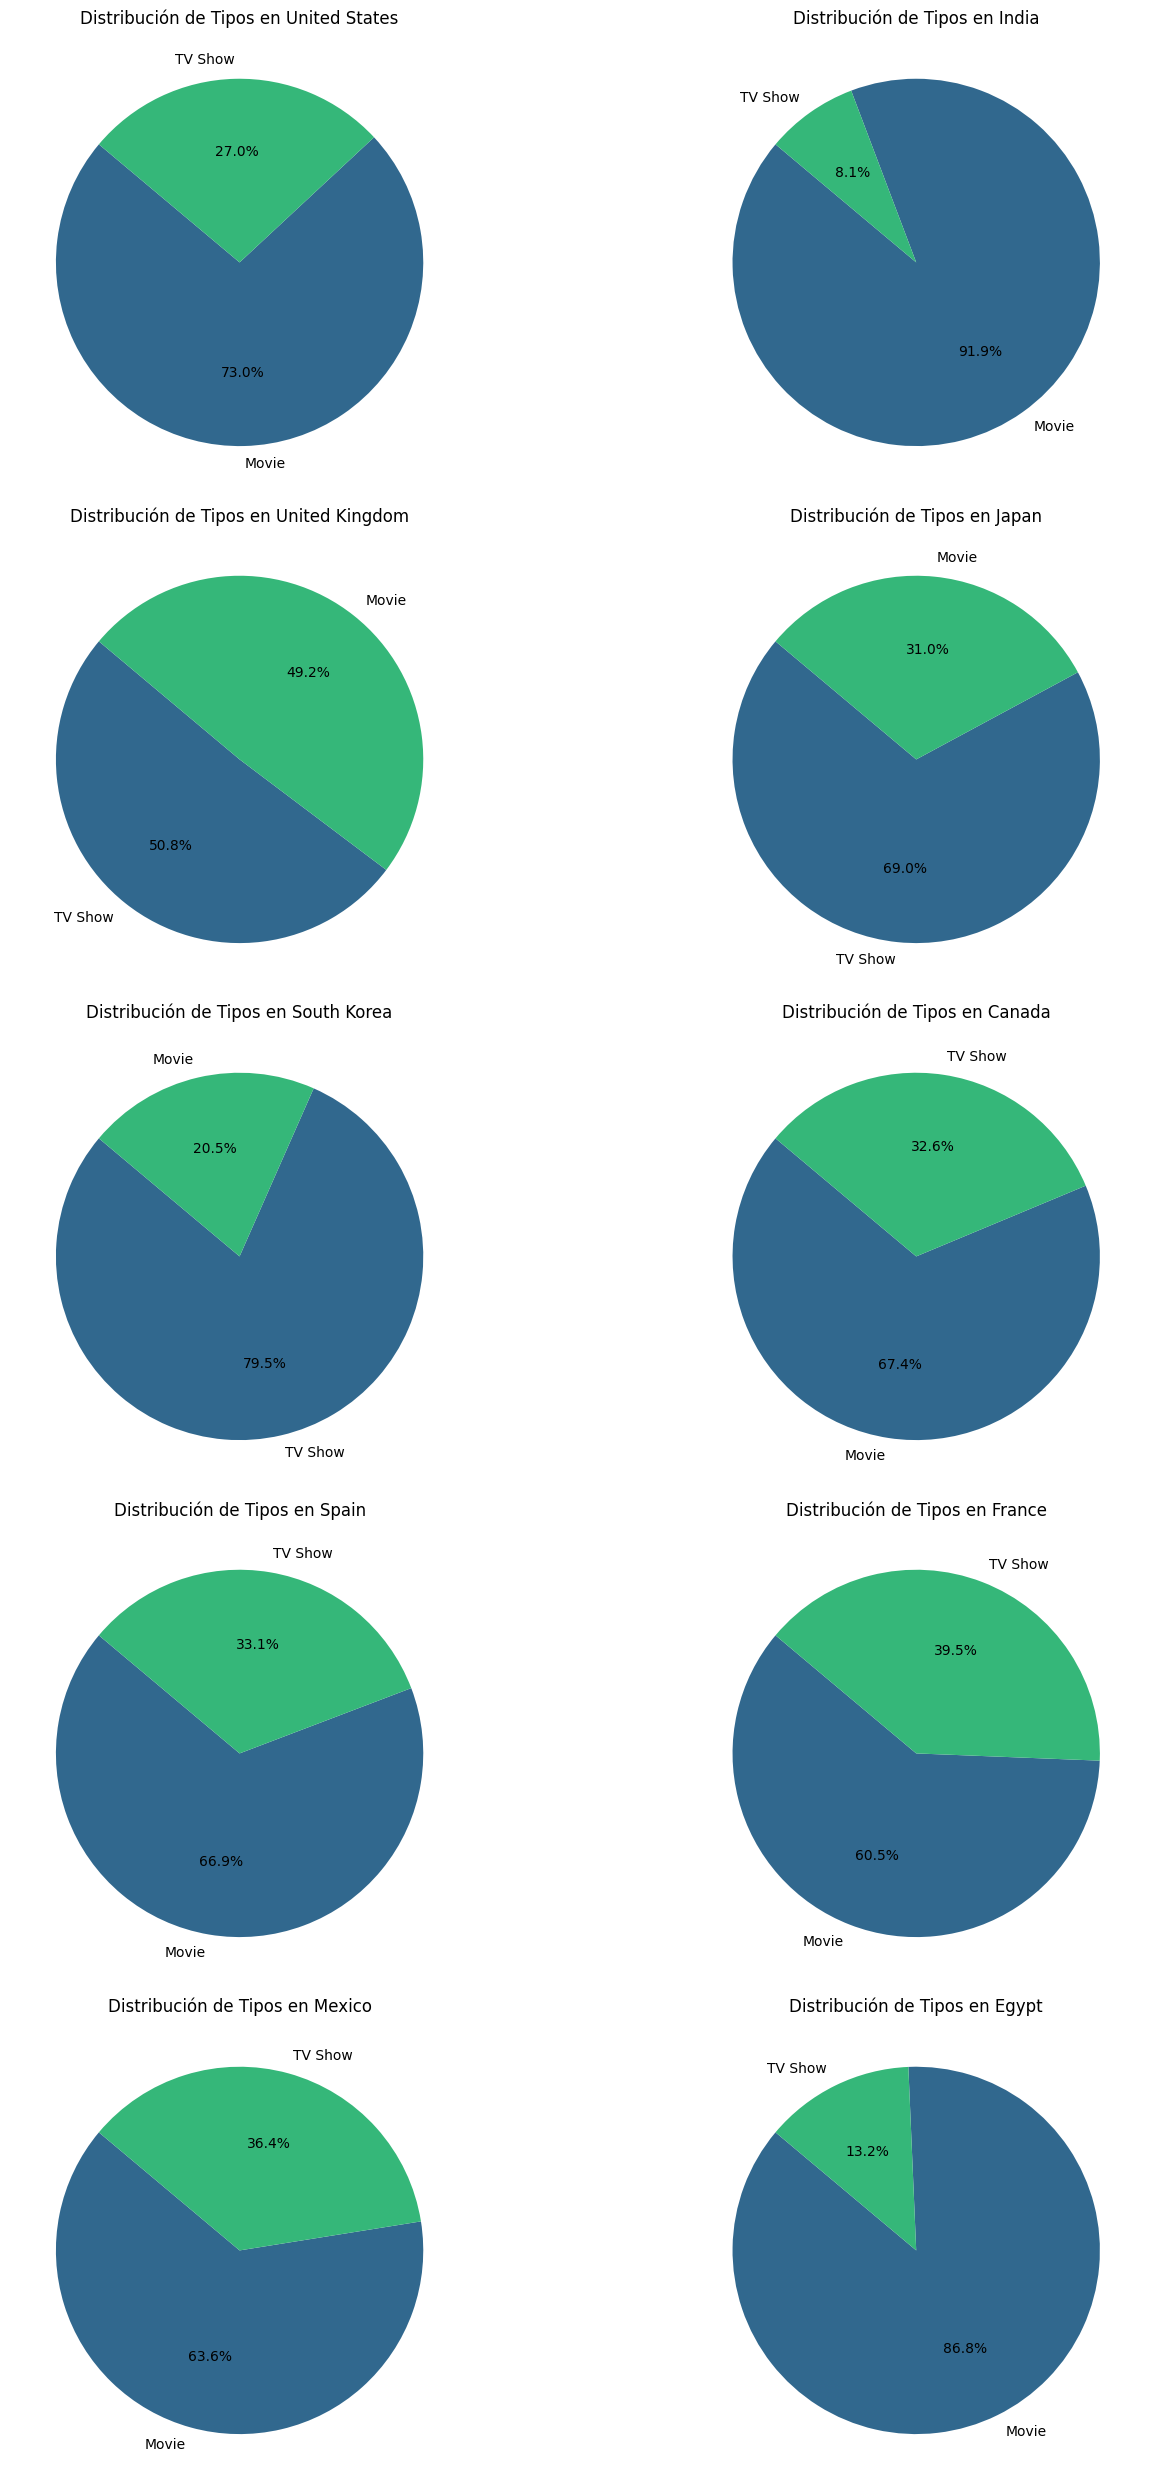

In [109]:
# Filtrar el dataframe para incluir solo los datos de los 10 países principales
top_10_countries_list = top_10_countries['country'].tolist()
df_top_10 = df[df['country'].isin(top_10_countries_list)]

# Crear subplots para la distribución de `type` en cada país
fig, axes = plt.subplots(5, 2, figsize=(16, 25))  # Ajusta el tamaño según sea necesario
axes = axes.flatten()  # Aplanar la matriz para facilitar el acceso

for i, country in enumerate(top_10_countries_list):
    country_data = df_top_10[df_top_10['country'] == country]
    type_counts = country_data['type'].value_counts()
    
    # Crear gráfico de anillo
    axes[i].pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(type_counts)))
    axes[i].set_title(f'Distribución de Tipos en {country}')
    
# Ajustar los espacios entre subplots
plt.tight_layout()
plt.show()

* India que es el segundo país con mayor cantidad de títulos, tiene solamente un 8.1% de proporción en series.
* United Kingdom, que es el tercer país con más publicaciones, tiene prácticamente la misma proporción de peliculas que de series en sus títulos. 
* En Japón y en Korea del Sur, hay más contenido de series que de películas.

## Speración por Género

In [114]:
# Separar los géneros usando .loc para evitar SettingWithCopyWarning
df_top_10.loc[:, 'genre'] = df_top_10['listed_in'].str.split(', ')

# Expandir el DataFrame para tener una fila por cada género
df_genres = df_top_10.explode('genre')

# Filtrar los géneros no deseados
filtered_genres = df_genres[~df_genres['genre'].isin(['International Movies', 'International TV Shows'])]

# Contar los géneros por país
genre_counts = filtered_genres.groupby(['country', 'genre']).size().reset_index(name='count')

# Obtener los 3 géneros más populares por país
top_3_genres_per_country = genre_counts.groupby('country').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

# Pivotar la tabla para que cada género sea una columna
top_3_genres_pivot = top_3_genres_per_country.pivot(index='country', columns='genre', values='count').fillna(0)

# Mostrar los datos preparados
top_3_genres_pivot

genre,Action & Adventure,Anime Features,Anime Series,British TV Shows,Children & Family Movies,Comedies,Crime TV Shows,Documentaries,Docuseries,Dramas,Independent Movies,Korean TV Shows,Romantic TV Shows,Spanish-Language TV Shows,TV Dramas
country,,,,,,,,,,,,,,,
Canada,0.0,0.0,0.0,0.0,31.0,39.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0
Egypt,14.0,0.0,0.0,0.0,0.0,57.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,31.0,0.0,0.0,0.0,0.0,20.0
India,0.0,0.0,0.0,0.0,0.0,308.0,0.0,0.0,0.0,620.0,150.0,0.0,0.0,0.0,0.0
Japan,46.0,54.0,131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,24.0,0.0,0.0,0.0,35.0,0.0
South Korea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,75.0,0.0,36.0
Spain,0.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,36.0,0.0
United Kingdom,0.0,0.0,0.0,196.0,0.0,0.0,0.0,84.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0


## Ver TOP 10 por género

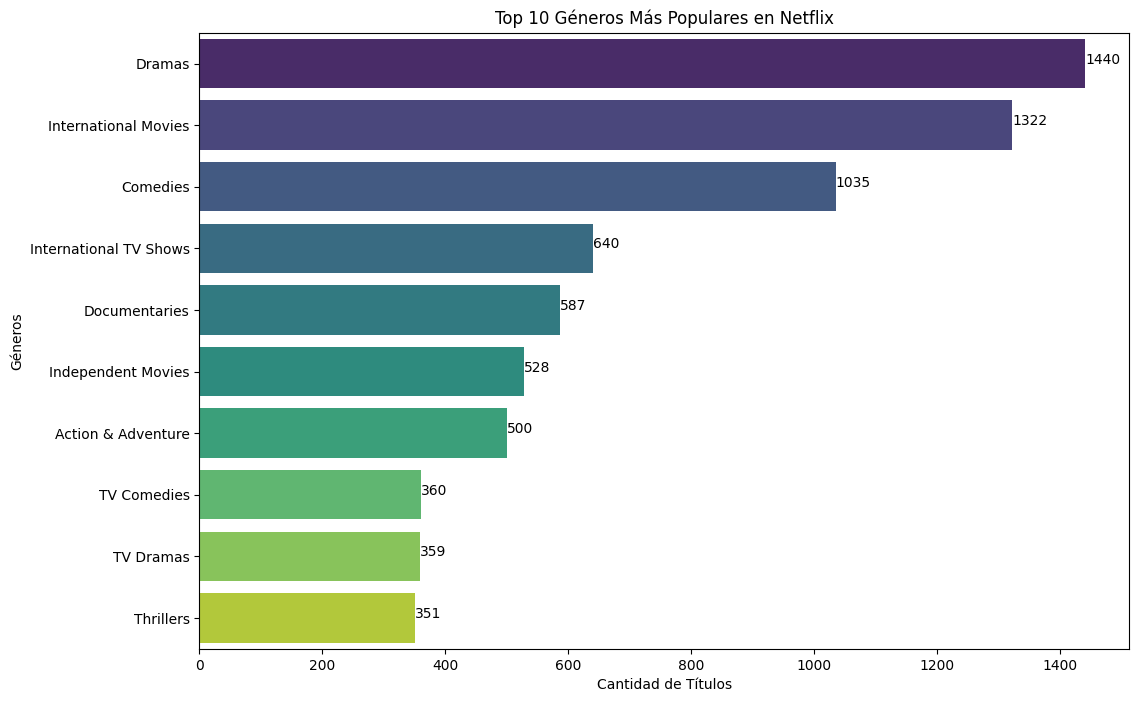

In [118]:
# Contar la cantidad de ocurrencias de cada género
genre_counts = df_genres['genre'].value_counts().head(10)

# Crear el gráfico de barras laterales
plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, dodge=False, palette='viridis', legend=False)

# Agregar etiquetas de valor
for index, value in enumerate(genre_counts.values):
    plt.text(value, index, str(value))

# Títulos y etiquetas
plt.title('Top 10 Géneros Más Populares en Netflix')
plt.xlabel('Cantidad de Títulos')
plt.ylabel('Géneros')

# Mostrar el gráfico
plt.show()

* TOP 3 de géneros: Drama, Comedia y Documentales.

## Ver TOP 10 de países en función del TOP 3 de Género

### Se opta por filtrar del top 3 de género a la categoría 'International Movies' y 'International TV Shows'

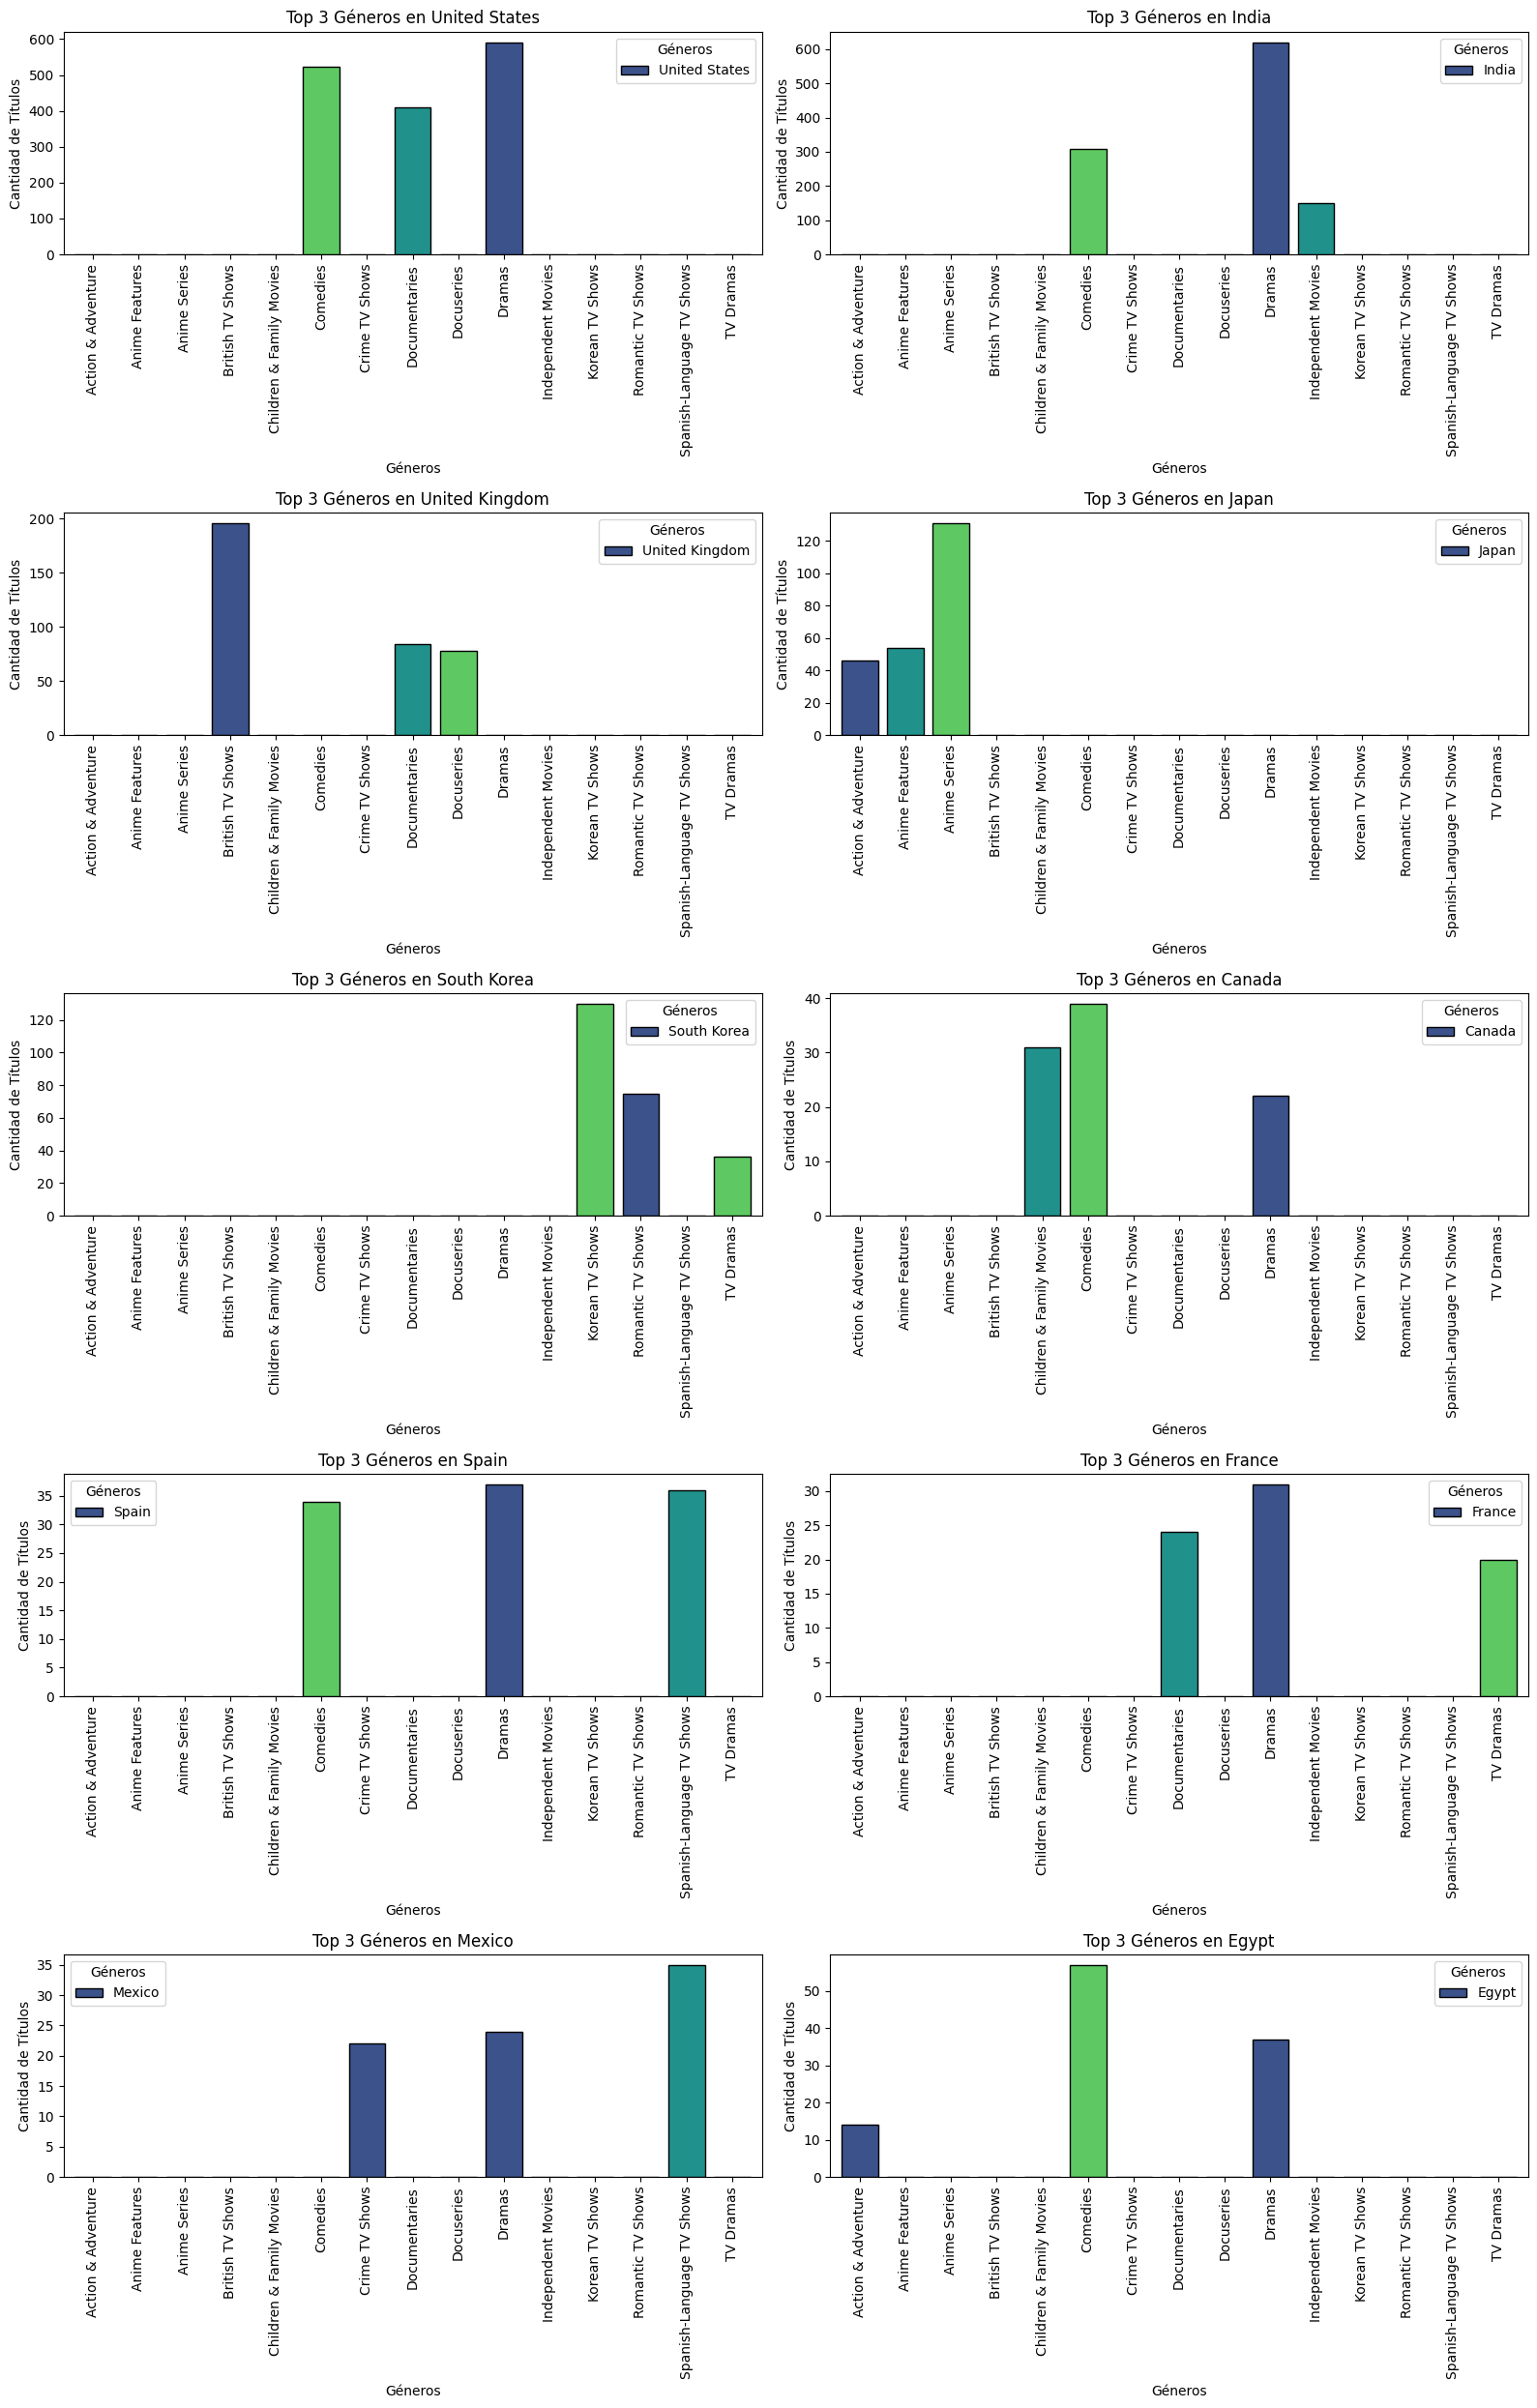

In [115]:
# Definir los colores para los gráficos
colors = sns.color_palette('viridis', n_colors=3)

# Crear subplots
fig, axes = plt.subplots(5, 2, figsize=(16, 25))
axes = axes.flatten()

# Dibujar gráficos de barras apiladas
for i, country in enumerate(top_10_countries_list):
    ax = axes[i]
    country_data = top_3_genres_pivot.loc[country]
    country_data.plot(kind='bar', stacked=True, ax=ax, color=colors, width=0.8, edgecolor='black')
    
    ax.set_title(f'Top 3 Géneros en {country}')
    ax.set_xlabel('Géneros')
    ax.set_ylabel('Cantidad de Títulos')
    ax.legend(title='Géneros')
    
# Ajustar los espacios entre subplots
plt.tight_layout()
plt.show()

* Si bien la categoría drama está presente entre los 3 géneros con más publicaciones en la mayoría de los países, se pude observar que existe una clara tendencia a especializar los géneros por región.

In [122]:
# Separar los géneros
df_filtered.loc[:, 'genre'] = df_filtered['listed_in'].str.split(', ')

# Expandir el DataFrame para tener una fila por cada género
df_genres = df_filtered.explode('genre')

# Filtrar los géneros 'International Movies' y 'International TV Shows'
df_genres = df_genres[~df_genres['genre'].isin(['International Movies', 'International TV Shows'])]

# Función para obtener el top 3 de géneros por año
def get_top_genres_by_year(df):
    top_genres_by_year = {}
    for year, group in df.groupby('release_year'):
        top_genres = group['genre'].value_counts().head(3).index.tolist()
        top_genres_by_year[year] = top_genres
    return top_genres_by_year

# Obtener el top 3 de géneros por año
top_genres_by_year = get_top_genres_by_year(df_genres)

# Filtrar el DataFrame para incluir solo los top 3 géneros por año
df_top_genres = df_genres[df_genres.apply(lambda row: row['genre'] in top_genres_by_year[row['release_year']], axis=1)]

# Contar las ocurrencias de cada género por año
genre_counts_by_year = df_top_genres.groupby(['release_year', 'genre']).size().unstack(fill_value=0)

# Mostrar los datos preparados
genre_counts_by_year

genre,Action,Action & Adventure,Children & Family Movies,Comedies,Documentaries,Dramas,Horror,Independent Movies,Romantic Movies,Sci-fi,TV Comedies,TV Dramas,Thrillers
release_year,,,,,,,,,,,,,
2000,0,9,0,16,0,13,0,0,0,0,0,0,0
2001,0,11,0,21,0,17,0,0,0,0,0,0,0
2002,0,15,0,11,0,21,0,0,0,0,0,0,0
2003,0,15,0,21,0,18,0,0,0,0,0,0,0
2004,0,17,0,22,0,20,0,0,0,0,0,0,0
2005,0,0,0,25,0,26,0,0,13,0,0,0,0
2006,0,0,0,35,0,36,0,0,13,0,0,0,0
2007,0,15,0,30,0,32,0,0,0,0,0,0,0
2008,0,24,0,43,0,49,0,0,0,0,0,0,0


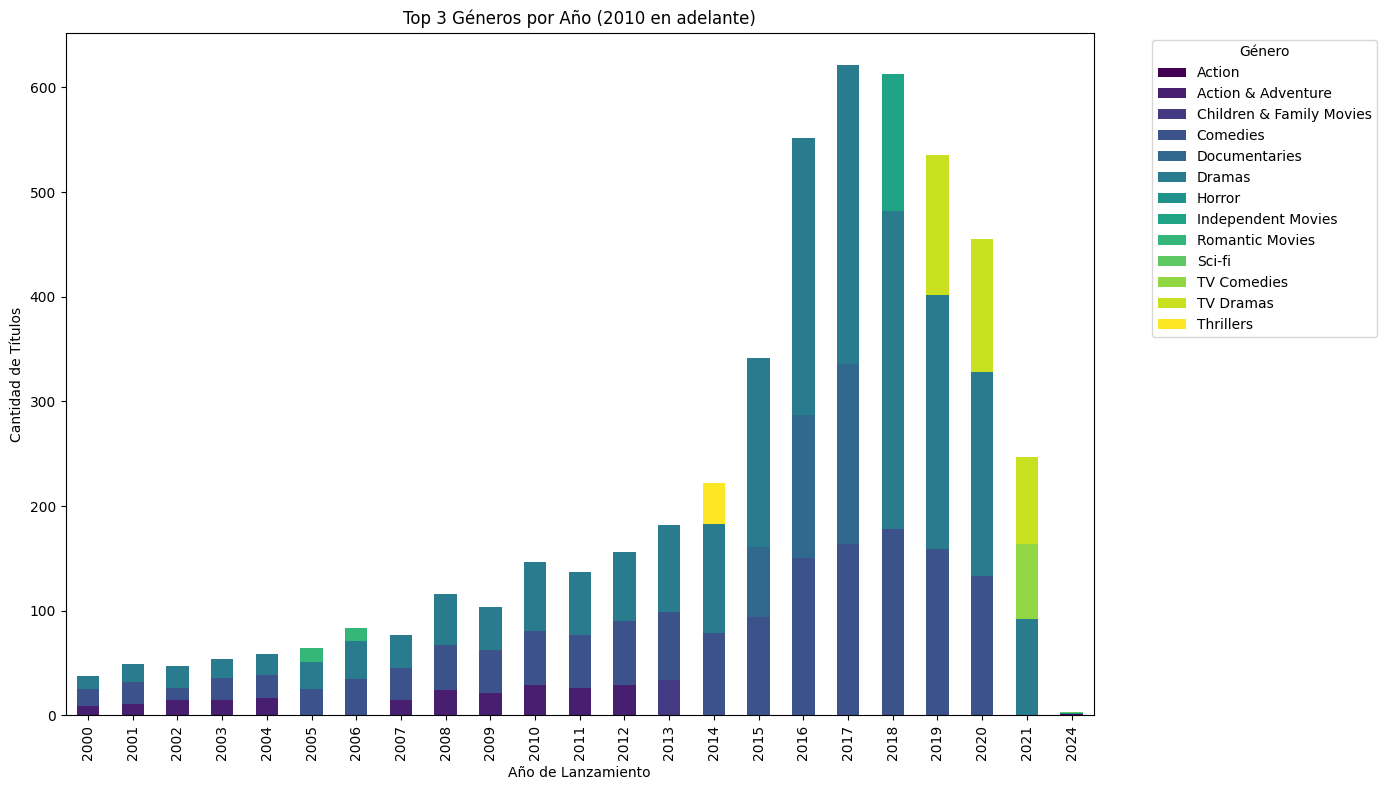

In [123]:
# Crear el gráfico de barras apiladas
genre_counts_by_year.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')

# Títulos y etiquetas
plt.title('Top 3 Géneros por Año (2010 en adelante)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Títulos')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

* El género 'Action & Adventure' hasta el año 2012 se encuentra en el top 3, luego de eso es desalojado por otros géneros, donde se dan los años de mayores publicaciones de títulos.
* Los géneros de 'comedies' y 'dramas', se mantienen en el top durante todos los años. 
* El género 'Documentaries' tiene presencia a partir del 2015, pero luego es suplantado por otro género de drama 'TV Dramas' y en 2021 por 'TV Comedies'
* En general estas modificaciones se deben al cambio de proporción entre la cantidad de publiciones de series de los últimos años. 